<a href="https://colab.research.google.com/github/minchang-KIm/-/blob/master/%ED%8C%8C%EC%9D%B4%EC%8D%AC1%EA%B8%89(%EC%8B%AC%ED%99%94).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#행맨 코딩하기

랜덤하게 생성한 비밀번호와 유저가 입력한 ID로 딕셔너리에 ID:PW를 저장하고

ID와 PW를 올바르게 입력했을경우에만 행맨게임을 할 수 있도록

ID/PW 까먹었을 경우 masterkey를 입력해야만 ID/PW를 조회할 수 있으며, masterkey 입력을 3회 이상 틀릴 경우 프로그램 중단.

##규칙
1. 랜덤하게 단어 생성 <- 미리 정해둔 단어들을 리스트에서 뽑아온다.
2. 패배조건 :라이프=3 라이프가 0으로 되면 게임종료
3. 승리조건 : 라이프가 > 0 일때 단어를 맞추면 승리
4. 사용자가 이미 입력한 글자는 다시 입력할 수 없도록

[메커니즘]
1. 유저에게서 글자하나 입력
1. 유저가 이미 입력한 글자를 입력하지 못하도록 한다.
2. 1.의 입력물이 생성한 단어의 스펠링 중 포함되는지 확인
3. a. 2. = true  스펠링 표시하기
3. b. 2. = false 라이프에서 차감
4.

In [ ]:
# 랜덤하게 단어 생성 <- 미리 정해둔 단어들을 리스트에서 뽑아온다.
word_list = ["apple", "banana", "cat"]

import random
the_word = random.choice(word_list)
the_word = 'apple'

life_point = 3

# 단어를 맞추면 : 1) 맞춰야 할 남은 글자수 == 0 / 2)맞힌 글자수 == the_word의 글자수
char_left = len(the_word)

# 사용자가 이미 입력한 글자는 다시 입력할 수 없도록
input_list = []

blanks = list("_" * len(the_word))
print("_ " * len(the_word))

_ _ _ _ _ 


In [ ]:
# 조건이 동적(정확히 몇 번 반복할지 모르므로) while 룹 사용
# 조건 1 : life_point == 0
# 조건 2 : char_left == 0

# while life_point > 0 and char_left > 0 :
#     user_input = input("글자 입력하세요: ")

In [ ]:
while life_point > 0 and char_left > 0 :
 ## 입력 ##

    # 올바르게 입력할때까지 반복
    while True :
        check_counter = 0
        # 유저에게서 글자하나 입력
        user_input = input("글자 입력하세요: ")

        # 유저가 이미 입력한 글자를 입력하지 못하도록 한다.
        # input_list에 이미 입력된 글자와 하나하나 대조해 본다.
        for 글자 in input_list:
            if user_input == 글자:
                check_counter += 1

        # check_counter == 0 -> 입력한적이 없다.
        if check_counter == 0:
            # input_list 에 해당 글자 추가
            input_list.append(user_input)
            break
        else:
            print("아직 입력하지 않은 글자만 입력 하세요")

    ## 문자 test ##
    correct_indicator = 0
    # user_input이 생성한 단어의 스펠링 중 포함되는지 확인
    for i in range(len(the_word)):
        if user_input.lower() == the_word[i].lower(): # 맞춘 상황
            # blank 업데이트
            blanks[i] = user_input.lower()
            # 남은 글자수 -1
            char_left -= 1
            correct_indicator += 1


    # 못맞춘 상황
    if correct_indicator == 0:
        life_point -= 1
        print("current life point is : ",life_point)
        print("남은 글자 수: ", char_left)

    print(blanks)

    # 게임오버 :
if life_point == 0:
    print("dead")
else:
    print("Victory!")


글자 입력하세요: a
['a', '_', '_', '_', '_']
글자 입력하세요: p
['a', 'p', '_', '_', '_']
['a', 'p', 'p', '_', '_']
글자 입력하세요: l
['a', 'p', 'p', 'l', '_']
글자 입력하세요: e
['a', 'p', 'p', 'l', 'e']
Victory!


## BLACK JACK
- 덱사이즈 = 무제한
- 조커카드 없음
- 잭/퀸/킹 = 10점
- Ace는 11 도 될 수 있고 1도 될 수 있음
- 카드 리스트 = [11, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10]
- The cards in the list have equal probability of being drawn.
- Cards are not removed from the deck as they are drawn.

게임 참조 : https://games.washingtonpost.com/games/blackjack/

규칙 참조 : http://listmoz.com/view/6h34DJpvJBFVRlZfJvxF

1. 컴퓨터와 유저에게 카드 2장씩 랜덤을 딜
2. 컴퓨터나 유저가 블랙잭 컴비네이션을 가지고 있는지 확인할 것
    - 블랙잭 : (잭/퀸/킹) + 에이스
3. 컴퓨터나 유저 중 블랙잭 컴비네이션을 가지고 있다면 승리
4. 가지고 있는 카드 스코어의 합을 유저/컴퓨터의 스코어로 등록
5. 에이스 카드를 받는다면 일단 11로 계산하고, 합이 21보다 크다면 11 대신에 1로 계산할 것
6. 컴퓨터의 첫 카드는 유저에게 보여준다
7. 컴퓨터/유저가 블랙잭을 만들거나 스코어가 21 이상 올라가면 게임이 끝난다
8. 유저가 "hit" <- 카드를 추가할 것인지 물어본다.
    - 유저가 카드를 추가하면 "hit", 추가하지 않고 유저의 차례가 끝난다면 "Stand" 이다
9. 유저가 카드를 더이상 추가하는것을 원하지 않으면 컴퓨터가 카드를 추가하도록 한다. 이때 현재 점수가 16점보다 높아질때까지 카드를 추가한다
10. 유저와 컴퓨터의 최종 점수를 비교하여 win/lose/draw(비김)을 출력한다.
11. 게임이 끝나면 사용자가 게임을 다시 할 것인지 물어보고 y라고 답할 경우 게임을 첨부터 시작한다

In [ ]:

import random

def deal_card():
    cards = [11,2,3,4,5,6,7,8,9,10,10,10,10]
    card = random.choice(cards)
    return card

# 점수 계산
def calculate_score(cards):
# 컴퓨터나 유저가 블랙잭 컴비네이션을 가지고 있는지 확인할 것
# 블랙잭 : (잭/퀸/킹) + 에이스
    if sum(cards) == 21 and len(cards) == 2:
        # 컴퓨터나 유저 중 블랙잭 컴비네이션을 가지고 있다면 승리
        return 0

# 에이스 카드를 받는다면 일단 11로 계산하고, 합이 21보다 크다면 11 대신에 1로 계산할 것
    if 11 in cards and sum(cards) > 21:
        cards.remove(11)
        cards.append(1)

    return sum(cards) # 현재 핸드의 점수


In [ ]:
def compare(user_score,computer_score):
    if user_score > 21:
        return "You lose"
    if user_score == computer_score:
        return "Draw"
    elif computer_score == 0:
        return "You lose. Dealer has the black jack"
    elif user_score == 0:
        return "You win. you have the black jack"
    elif user_score > 21:
        return "You lose"
    elif computer_score > 21:
        return "You Win"
    elif user_score > computer_score:
        return "You Win"
    else :
        return "You lose"

In [ ]:
user_cards = []
computer_cards = []

is_game_over = False

# 컴퓨터와 유저에게 카드 2장씩 랜덤을 딜

for i in range(2):
    user_cards.append(deal_card())
    computer_cards.append(deal_card())

# User_turn
while not is_game_over:
    user_score = calculate_score(user_cards)
    computer_score = calculate_score(computer_cards)

    print(f"플레이어 핸드 : {user_cards}, current score:{user_score}")
    print(f"딜러 핸드 : {computer_cards[1]}") # 컴퓨터의 첫 카드는 유저에게 보여준다

    # 컴퓨터나 유저 중 블랙잭 컴비네이션을 가지고 있다면 승리
    if user_score == 0 or computer_score == 0 or user_score > 21:
        is_game_over = True
# 컴퓨터/유저가 블랙잭을 만들거나 스코어가 21 이상 올라가면 게임이 끝난다
    else :# 유저가 "hit" <- 카드를 추가할 것인지 물어본다.
        user_hit = input("Hit or Stnad?(Hit)")
        if user_hit == 'y':
            user_cards.append(deal_card())
        else:# 유저가 카드를 추가하면 "hit", 추가하지 않고 유저의 차례가 끝난다면 "Stand" 이다
            is_game_over = True

#computer_turn
# 유저가 카드를 더이상 추가하는것을 원하지 않으면 컴퓨터가 카드를 추가하도록 한다. 이때 현재 점수가 16점보다 높아질때까지 카드를 추가한다
while computer_score != 0 and computer_score < 17:
    computer_cards.append(deal_card())
    computer_score = calculate_score(computer_cards)


#최종 집계
print("최종점수 ")
print(f"플레이어 핸드 : {user_cards}, current score:{user_score}")
print(f"딜러 핸드 : {computer_cards}, current score:{computer_score}")
compare(user_score,computer_score)

플레이어 핸드 : [8, 5], current score:13
딜러 핸드 : 10
Hit or Stnad?(Hit)y
플레이어 핸드 : [8, 5, 7], current score:20
딜러 핸드 : 10
Hit or Stnad?(Hit)n
최종점수 
플레이어 핸드 : [8, 5, 7], current score:20
딜러 핸드 : [8, 10], current score:18


'You Win'

# 사용자 정의 함수

## Local 및 Global Scope

영화 인셉션 에서는 꿈 안의 꿈 안의 꿈으로 내려간다.
현실에서 음악을 틀어준다. -> 꿈(식당에서 식사.) 안의 꿈(자동차 추격) 안의 꿈(설산에서 총격전) 까지 음악이 전달된다.

반대로는 전달이 되지 않는다.

- 현실의 음악 -> Global Variable
- 꿈속의 현상 -> Local Variable

In [ ]:
no_enemies = 3
name_enemies = 'skeleton warrior'

def encounter_enemies(no_enemies, name_enemies):
    print(name_enemies, '가', no_enemies, '마리 출현했다')

encounter_enemies(no_enemies, name_enemies)

skeleton warrior 가 3 마리 출현했다


In [ ]:
# 사용자 정의 함수 밖에서 선언된 변수들은 Global 변수이다.
# 변수는 위에서 아래로 흘러갈 수 있다.

no_enemies = 3
name_enemies = 'skeleton warrior'

def encounter_enemies():
    print(name_enemies, '가', no_enemies, '마리 출현했다')

encounter_enemies()
print(name_enemies, '가', no_enemies, '마리 출현했다')

skeleton warrior 가 3 마리 출현했다
skeleton warrior 가 3 마리 출현했다


In [ ]:
# local variables은 해당 함수 안에서만 사용할 수 있다.

def encounter_enemies():
    # local variables : 사용자 정의 함수 안에서 선언된 변수
    no_enemies = 3
    name_enemies = 'skeleton warrior'
    print(name_enemies, '가', no_enemies, '마리 출현했다')

encounter_enemies()
print(name_enemies, '가', no_enemies, '마리 출현했다')

skeleton warrior 가 3 마리 출현했다


NameError: name 'name_enemies' is not defined

In [ ]:
def encounter_enemies():
    global no_enemies
    no_enemies = 3
    # name_enemies = 'skeleton warrior'
    # print(name_enemies, '가', no_enemies, '마리 출현했다')

encounter_enemies()
print(no_enemies, '마리 출현했다')

3 마리 출현했다


In [ ]:
def encounter_enemies():
    global no_enemies, name_enemies
    no_enemies = 3
    name_enemies = 'skeleton warrior'
    # print(name_enemies, '가', no_enemies, '마리 출현했다')

encounter_enemies()
print(name_enemies, '가', no_enemies, '마리 출현했다')


skeleton warrior 가 3 마리 출현했다


## Lambda 함수

- 함수를 "무명"으로, "선언 없이" 사용하기 위해 사용.
- lambda : chain of action

In [ ]:
# x, y를 더하는 함수를 만들어라.

def add(x, y):
    return x + y

add(1,2)

3

In [ ]:
def 함수이름(input):
    process => output
    return output
output = 함수이름(input)


output = lambda input : process

In [ ]:
list_of_strings = ['one', 'two', 'four', 'three']
# 리스트의 요소 수를 구해주는 함수를 만들어 보아라.

def length_list(list):
    return len(list)

leng = length_list(list_of_strings)

4

In [ ]:
leng = lambda list:len(list)
leng(list_of_strings)

4

### 람다함수 실습

1. 리스트의 각 요소에 2를 더하는 람다 함수를 작성하세요.
1. 문자열 리스트에서 각 문자열의 길이를 반환하는 람다 함수를 작성하세요.
1. 리스트의 각 요소를 제곱하는 람다 함수를 작성하세요.
1.주어진 두 리스트의 요소를 더하는 람다 함수를 작성하세요.
1. 리스트에서 짝수만 필터링하는 람다 함수를 작성하세요.
1. 리스트에서 특정 문자열이 포함된 요소만 필터링하는 람다 함수를 작성하세요.
1. 리스트의 요소들을 문자열로 변환하는 람다 함수를 작성하세요.
1. 두 리스트의 요소를 곱하는 람다 함수를 작성하세요.
1. 리스트의 각 요소를 음수로 변환하는 람다 함수를 작성하세요.
1. 리스트에서 특정 길이 이상의 문자열만 필터링하는 람다 함수를 작성하세요.


In [ ]:
# 리스트의 각 요소에 2를 더하는 람다 함수를 작성하세요.
nums = [1,2,3,4,5]

# map()
result = list(map(lambda x : x+2, nums))
result

[3, 4, 5, 6, 7]

In [ ]:
# 문자열 리스트에서 각 문자열의 길이를 반환하는 람다 함수를 작성하세요.

words = ["apple", "banana", "cherry"]
lengths = list(map(lambda x: len(x), words))
lengths

[5, 6, 6]

In [ ]:
# 리스트의 각 요소에 2를 더하는 람다 함수를 작성하세요.
nums = [1,2,3,4,5]

# map()
result = list(map(lambda x : x**2, nums))
result

[1, 4, 9, 16, 25]

In [ ]:
#주어진 두 리스트의 요소를 더하는 람다 함수를 작성하세요.
nums_1 = [1,2,3,4,5]
nums_2 = [1,2,3,4,5]


# map()
result = list(map(lambda x,y : x + y, nums_1,nums_2))
result

[2, 4, 6, 8, 10]

In [ ]:
# 리스트에서 짝수만 필터링하는 람다 함수를 작성하세요.
nums_1 = [1,2,3,4,5]

evens = list(filter(lambda x : x % 2 == 0, nums))
evens

[2, 4]

In [ ]:
# 리스트에서 특정 문자열이 포함된 요소만 필터링하는 람다 함수를 작성하세요.
fruits = ["apple", "banana", "cherry", "date"]
#"a"가 포함된
# if a in list :
result = list(filter(lambda x: "a" in x, fruits))
result



['apple', 'banana', 'date']

In [ ]:
# 리스트의 요소들을 문자열로 변환하는 람다 함수를 작성하세요.
nums_1 = [1,2,3,4,5]
result = list(map(lambda x : str(x),nums_1 ))
result

['1', '2', '3', '4', '5']

In [ ]:
# 두 리스트의 요소를 곱하는 람다 함수를 작성하세요.
nums_1 = [1,2,3,4,5]
nums_2 = [1,2,3,4,5]


# map()
result = list(map(lambda x,y : x * y, nums_1,nums_2))
result

[1, 4, 9, 16, 25]

In [ ]:
# 리스트의 각 요소를 음수로 변환하는 람다 함수를 작성하세요.
nums_1 = [1,2,3,4,5]
result = list(map(lambda x : -x , nums_1))
result

[-1, -2, -3, -4, -5]

In [ ]:
# 리스트에서 특정 길이 이상의 문자열만 필터링하는 람다 함수를 작성하세요.

# 리스트에서 특정 문자열이 포함된 요소만 필터링하는 람다 함수를 작성하세요.
fruits = ["apple", "banana", "cherry", "date"]
#"a"가 포함된
# if a in list :
result = list(filter(lambda x: len(x) > 5, fruits))
result

['banana', 'cherry']

# 리스트 컴프리헨션(For 반복문 요약하기)

In [ ]:
# 기본구문
[표현식 for 항목 in 반복가능한객체]

NameError: name '반복가능한객체' is not defined

In [ ]:
nums = [1, 2, 3, 4, 5]
squared = []

for num in nums:
    squared.append(num ** 2)

squared

[1, 4, 9, 16, 25]

In [ ]:
squared = []
# [표현식 for 항목 in 반복가능한객체]
squared = [num ** 2 for num in nums]
squared

[1, 4, 9, 16, 25]

In [ ]:
nums = [1, 2, 3, 4, 5, 6]
even_nums = []

# for num in nums:
#     if num % 2 ==0:
#         even_nums.append(num)

even_nums = [num for num in nums if num % 2 ==0]
even_nums

[2, 4, 6]

In [ ]:
matrix = []

for i in range(3):
    for j in range(3):
        matrix.append((i,j))

matrix

[(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]

In [ ]:
matrix = [ (i,j) for i in range(3) for j in range(3)]
matrix

[(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]

장점
- 간결성
- 가독성
- 성능

1. 0부터 20까지의 짝수를 생성하는 리스트 컴프리헨션을 작성하세요.
1. 1부터 10까지의 숫자의 제곱을 생성하는 리스트 컴프리헨션을 작성하세요.
1. 문자열 리스트 words가 주어졌을 때, 이 문자열들의 길이로 이루어진 리스트를 만드세요.
1. 문자열 리스트 words가 주어졌을 때, 각 문자열을 대문자로 변환한 새로운 리스트를 만드세요.
1. 리스트 nums에서 음수를 제외하는 리스트 컴프리헨션을 작성하세요.

1. 2부터 50까지의 소수를 생성하는 리스트 컴프리헨션을 작성하세요.

1. 피보나치 수열의 처음 10개의 숫자를 생성하는 리스트 컴프리헨션을 작성하세요.
1. 문자열 text가 주어졌을 때, 문자열에서 모음을 추출하는 리스트를 만드세요.

1. Data "평탄화" Flatten <- 차원 축소
예) [[1,2,3],[4,5,6],[7,8,9]] -> [1,2,3,4,5,6,7,8,9]

In [ ]:
# 0부터 20까지의 짝수를 생성하는 리스트 컴프리헨션을 작성하세요.
even_numbers = [x for x in range(21) if x %2 ==0]
even_numbers

In [ ]:
# 1부터 10까지의 숫자의 제곱을 생성하는 리스트 컴프리헨션을 작성하세요.
squres = [x**2 for x in range(1,11)]
squres

[1, 4, 9, 16, 25, 36, 49, 64, 81, 100]

In [ ]:
# 문자열 리스트 words가 주어졌을 때, 이 문자열들의 길이로 이루어진 리스트를 만드세요.
words = ['apple', 'banana', 'cherry']
lengths = [len(x) for x in words]
lengths

[5, 6, 6]

In [ ]:
# 문자열 리스트 words가 주어졌을 때, 각 문자열을 대문자로 변환한 새로운 리스트를 만드세요.
words = ['apple', 'banana', 'cherry']
capitalized = [word.upper() for word in words]
capitalized

['APPLE', 'BANANA', 'CHERRY']

In [ ]:
# 리스트 nums에서 음수를 제외하는 리스트 컴프리헨션을 작성하세요.
nums = [-2, -1, 0, 1, 2]
non_negative = [x for x in nums if x >= 0]
non_negative


[0, 1, 2]

In [ ]:
# 2부터 50까지의 소수(prime number)를 생성하는 리스트 컴프리헨션을 작성하세요.
primes = []

# for x in range(2,51):
#     is_prime = True
#     for y in range(2, int(x**0.5) + 1):
#         if x % y == 0:
#             is_prime = False
#             break
#     if is_prime :
#         primes.append(x)

# print(primes)

primes = [x for x in range(2,51) if all(x % y !=0 for y in range(2,int(x**0.5)+ 1))]
primes



[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47]


[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47]

In [ ]:
# 피보나치 수열의 처음 10개의 숫자를 생성하는 리스트 컴프리헨션을 작성하세요.

fib = [0,1]

for i in range(8):
    fib.append(fib[-2]+fib[-1])
print(fib)

fib = [0,1]
[fib.append(fib[-2]+fib[-1])  or fib[-1] for i in range(8)]
fib

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34]


[0, 1, 1, 2, 3, 5, 8, 13, 21, 34]

In [ ]:
# 문자열 text가 주어졌을 때, 문자열에서 모음을 추출하는 리스트를 만드세요.
text = "Hello python"
vowels = [char for char in text if char in 'aeiouAEIOU']
vowels


['e', 'o', 'o']

In [ ]:
# Data "평탄화" Flatten <- 차원 축소 예) [[1,2,3],[4,5,6],[7,8,9]] -> [1,2,3,4,5,6,7,8,9]

list_of_lists = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
flattened = [x for sublist in list_of_lists for x in sublist]
flattened

[1, 2, 3, 4, 5, 6, 7, 8, 9]

# 정규(표현)식 (Regular Expression)

- 메타 문자 : 원래 문자가 가진 뜻 이 아닌 다른 뜻을 가지는 문자.
~!@#$%^&*()_+  '\'

AGI 시대에서 인간의 역할?
- Problem identification
- big picture

- Validation : 완전 차세대 AGI 가 나오지 않는 이상 무조건 필요.
    - 논리의 부재.
 <-> 책임
 - 책임의 자격 : 서류로 판단.

AGI counter- hallucination measure
- Fine Tune
- RAG : 지정한 knowledge base 에 한해서만 답변.
- prompt


In [ ]:
import re


- [a - z] <- a부터 z까지 모두(소문자)
- [a-zA-Z] <- a부터 z까지 모두(대/소문자)
- [0-9] : 숫자
- [가-힣]


In [ ]:
p = re.compile('[a-z]+')
p

re.compile(r'[a-z]+', re.UNICODE)

In [ ]:
- match()  : 문자열의 처음부터 정규식과 매치되는지 조사
- search()  : 문자열 전체를 검색하여 정규식과 매치되는지 조사

- findall()  : 정규식과 매치되는 모든 문자열을 리스트로 변환한다.
- finditer()  : 정규식과 매치되는 모든 문자열을 반복(iteration)가능한 객체 로 변환한다.

In [ ]:
m = p.match("python")
m

<re.Match object; span=(0, 6), match='python'>

In [ ]:
m = p.match("123 python")
print(m)

None


## .기호

In [ ]:
r = re.compile("a.c")
r.search("kkk")

In [ ]:
r.search("adc")

<re.Match object; span=(0, 3), match='adc'>

## ? 기호

In [ ]:
r = re.compile("ab?c")
r.search("abbc")

In [ ]:
r.search("abc")

<re.Match object; span=(0, 3), match='abc'>

In [ ]:
r.search("ac")

<re.Match object; span=(0, 2), match='ac'>

* 기호

In [ ]:
r = re.compile("ab*c")
r.search("a")

In [ ]:
r.search("ac")

<re.Match object; span=(0, 2), match='ac'>

In [ ]:
r.search("abc")

<re.Match object; span=(0, 3), match='abc'>

In [ ]:
r.search("abbbbc")

<re.Match object; span=(0, 6), match='abbbbc'>

# + 기호

In [ ]:
r = re.compile("ab+c")

In [ ]:
r.search("ac")

In [ ]:
r.search("abc")

<re.Match object; span=(0, 3), match='abc'>

In [ ]:
r.search("abbbbc")

<re.Match object; span=(0, 6), match='abbbbc'>

^ 기호

In [ ]:
r = re.compile("^ab")

In [ ]:
r.search("abz")

<re.Match object; span=(0, 2), match='ab'>

In [ ]:
r.search("acz")

In [ ]:
r.search("bbc")

In [ ]:
r.search("zab")

## {숫자} 기호

In [ ]:
r = re.compile("ab{2}c")

In [ ]:
r.search("ac")

In [ ]:
r.search("abc")

In [ ]:
r.search("abbc")

<re.Match object; span=(0, 4), match='abbc'>

In [ ]:
r = re.compile("ab{2,8}c")

In [ ]:
r.search("ac")
r.search("abc")

In [ ]:
r.search("abbc")

<re.Match object; span=(0, 4), match='abbc'>

In [ ]:
r.search("abbbbbbbbc")

<re.Match object; span=(0, 10), match='abbbbbbbbc'>

In [ ]:
r.search("abbbbbbbbbc")

In [ ]:
r = re.compile("a{2,}bc")

In [ ]:
r.search("bc")

In [ ]:
r.search("aa")

In [ ]:
r.search("aabc")

<re.Match object; span=(0, 4), match='aabc'>

In [ ]:
r.search("aaaaaaaaaaabc")

<re.Match object; span=(0, 13), match='aaaaaaaaaaabc'>

## [] 기호

In [ ]:
r = re.compile("[abc]")  # [a-c]
r.search("zzz")

In [ ]:
r.search("a")

<re.Match object; span=(0, 1), match='a'>

In [ ]:
r.search("aaaaaaa")

<re.Match object; span=(0, 1), match='a'>

In [ ]:
r.search("baac")

<re.Match object; span=(0, 1), match='b'>

In [ ]:
r = re.compile("[a-z]")

In [ ]:
r.search("AAA")
r.search("111")

In [ ]:
r.search("aBC")

<re.Match object; span=(0, 1), match='a'>

# [^ ]

In [ ]:
r = re.compile("[^abc]")

r.search("a")
r.search("ab")
r.search("b")

In [ ]:
r.search("d")

<re.Match object; span=(0, 1), match='d'>

In [ ]:
r.search("111")

<re.Match object; span=(0, 1), match='1'>

# [정규식 모듈함수]
1) re.match() 와 re.search()의 차이

In [ ]:
r = re.compile("ab.")

In [ ]:
r.match("kkkabc")

In [ ]:
r.search("kkkabc")

<re.Match object; span=(3, 6), match='abc'>

In [ ]:
r.match("abckkk")

<re.Match object; span=(0, 3), match='abc'>

2) re.split()

In [ ]:
text = "사과 딸기 수박 메론 바나나"
re.split(" ",text)

['사과', '딸기', '수박', '메론', '바나나']

In [ ]:
text="""사과
딸기
수박
메론
바나나"""

re.split("\n",text)

['사과', '딸기', '수박', '메론', '바나나']

# 3)re.findall()

In [ ]:
text = """이름 : 김철수
전화번호 : 010 - 1234 - 1234
나이 : 30
성별 : 남"""

re.findall("\d+", text)

['010', '1234', '1234', '30']

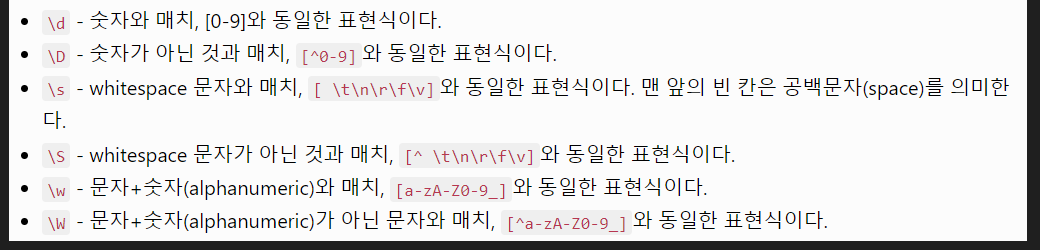

In [ ]:
re.findall("\D+", text)

['이름 : 김철수\n전화번호 : ', ' - ', ' - ', '\n나이 : ', '\n성별 : 남']

4) re.sub()

In [ ]:
text = "Regular expression : A regular expression, regex or regexp[1] (sometimes called a rational expression)[2][3] is, in theoretical computer science and formal language theory, a sequence of characters that define a search pattern."

preprocessed_text = re.sub('[^a-zA-Z]', ' ', text)
preprocessed_text

'Regular expression   A regular expression  regex or regexp     sometimes called a rational expression        is  in theoretical computer science and formal language theory  a sequence of characters that define a search pattern '

In [ ]:
# 문자만 추출하기 - > 리스트 형태로 변환
text = """100 John    PROF
101 James   STUD
102 Mac   STUD"""

re.split('\s+', text)

['100', 'John', 'PROF', '101', 'James', 'STUD', '102', 'Mac', 'STUD']

In [ ]:
# 숫자만 추출 : 붙어있는 문자 끼리 함께
re.findall('\d+', text)

['100', '101', '102']

In [ ]:
# 대문자 추출
re.findall('[A-Z]', text)

['J', 'P', 'R', 'O', 'F', 'J', 'S', 'T', 'U', 'D', 'M', 'S', 'T', 'U', 'D']

In [ ]:
# job code 추출
re.findall('[A-Z]{4}', text)

['PROF', 'STUD', 'STUD']

In [ ]:
# 이름만 추출
re.findall('[A-Z][a-z]+', text)

['John', 'James', 'Mac']

# 클래스
- 클래스 : 미리 만들어 둔 "틀"
- 인스턴스 : 클래스를 통해 만든 case

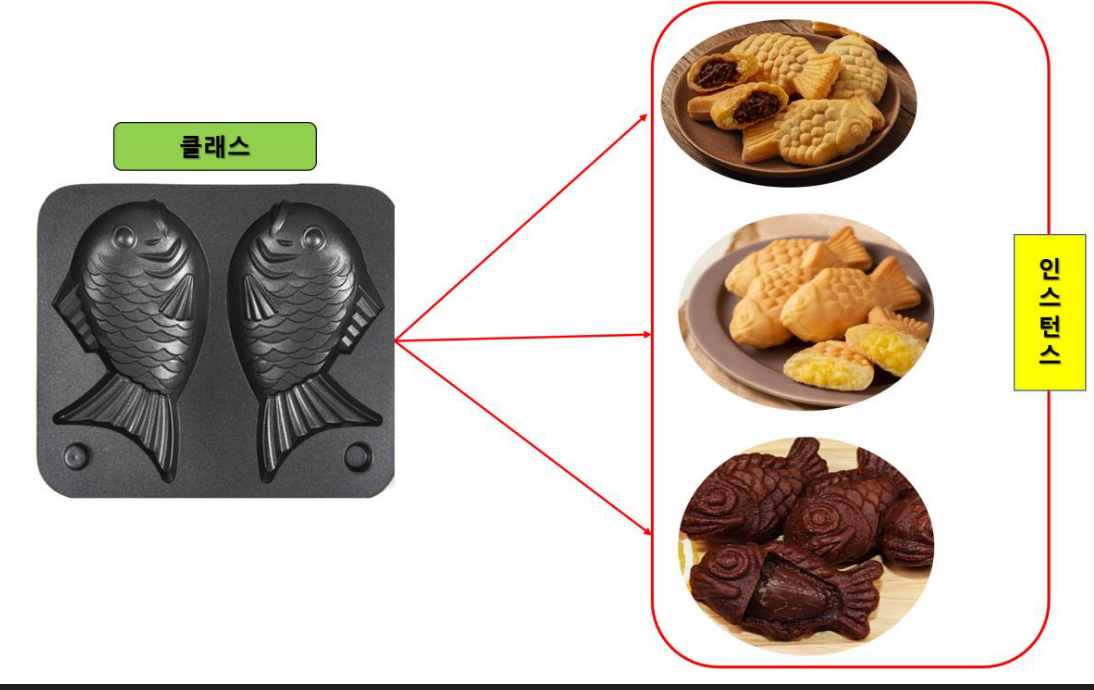

In [ ]:
class 클래스이름:
    변수/함수

NameError: name '변수' is not defined

In [ ]:
class goldfish_bread:
    재료 = '팥'
    가격 = '500원'


In [ ]:
goldfish_bread.재료
goldfish_bread.가격

'500원'

In [ ]:
팥붕어빵 = goldfish_bread()
팥붕어빵.재료
팥붕어빵.가격

'500원'

In [ ]:
팥붕어빵.가격 = '800원'
팥붕어빵.가격

'800원'

In [ ]:
goldfish_bread.가격

'500원'

In [ ]:
# 클래스 + 사용자 정의 함수

class goldfish_bread:
    재료 = '팥'
    가격 = '500원'

    def say(self):
        print(f"{self.재료} 붕어빵 1개 가격은 {self.가격}입니다")

In [ ]:
팥붕어빵 = goldfish_bread()
팥붕어빵.say()

팥 붕어빵 1개 가격은 500원입니다


In [ ]:
# 슈크림 붕어빵 인스턴스 만들기
슈크림붕어빵 = goldfish_bread()
슈크림붕어빵.재료 = '슈크림'
슈크림붕어빵.가격 = "1000원"
슈크림붕어빵.say()

슈크림 붕어빵 1개 가격은 1000원입니다


In [ ]:
class Car:
    def __init__(self, make, model, year):
        self.make = make
        self.model = model
        self.year = year
    def display_info(self):
        print(f"본 자동차의 브랜드는 {self.make}, 모델명은 {self.model} 생산연도는 {self.year}")


In [ ]:
car1 = Car("Toyota", "Camry", 2020)
car2 = Car("Honda", "Civic", 2018)

car1.display_info()
car2.display_info()

본 자동차의 브랜드는 Toyota, 모델명은 Camry 생산연도는 2020
본 자동차의 브랜드는 Honda, 모델명은 Civic 생산연도는 2018


In [ ]:
class Car:
    total_cars = 0

    def __init__(self, make, model, year):
        self.make = make
        self.model = model
        self.year = year
        Car.increment_total_cars(Car)

    def display_info(self):
        print(f"본 자동차의 브랜드는 {self.make}, 모델명은 {self.model} 생산연도는 {self.year}")

    def increment_total_cars(cls):
        cls.total_cars += 1

car1 = Car("Toyota", "Camry", 2020)
car2 = Car("Honda", "Civic", 2018)
car3 = Car("Tesla", "Model X", 2021)

car1.display_info()
car2.display_info()
car3.display_info()

print(f'총 자동차 수 {Car.total_cars}')

본 자동차의 브랜드는 Toyota, 모델명은 Camry 생산연도는 2020
본 자동차의 브랜드는 Honda, 모델명은 Civic 생산연도는 2018
본 자동차의 브랜드는 Tesla, 모델명은 Model X 생산연도는 2021
총 자동차 수 3


In [ ]:
class Car:
    total_cars = 0

    def __init__(self, make, model, year):
        self.make = make
        self.model = model
        self.year = year
        Car.increment_total_cars(Car)

    def display_info(self):
        print(f"본 자동차의 브랜드는 {self.make}, 모델명은 {self.model} 생산연도는 {self.year}")

    def increment_total_cars(cls):
        cls.total_cars += 1

    def is_electric(make):
        return make == "Tesla"

car1 = Car("Toyota", "Camry", 2020)
car2 = Car("Honda", "Civic", 2018)
car3 = Car("Tesla", "Model X", 2021)

car1.display_info()
car2.display_info()
car3.display_info()

print(f'총 자동차 수 {Car.total_cars}')

Car.is_electric('Tesla')
print(f"Tesla는 전기차인가? {'yes' if Car.is_electric('Tesla') else 'no'}")

본 자동차의 브랜드는 Toyota, 모델명은 Camry 생산연도는 2020
본 자동차의 브랜드는 Honda, 모델명은 Civic 생산연도는 2018
본 자동차의 브랜드는 Tesla, 모델명은 Model X 생산연도는 2021
총 자동차 수 3
Tesla는 전기차인가? yes


In [ ]:
# Class 상속

class ElectricCar(Car):
    def __init__(self, make, model, year, battery_size):
        super().__init__(make, model, year)
        self.battery_size = battery_size

    # Car 의 display_info함수
    # def display_info(self):
    #     print(f"본 자동차의 브랜드는 {self.make}, 모델명은 {self.model} 생산연도는 {self.year}")
    def display_info(self):
        super().display_info()
        print(f"battery_size : {self.battery_size} kwh")

electric_car = ElectricCar("Tesla", "Model 3", 2022, 70 )

electric_car.display_info()

본 자동차의 브랜드는 Tesla, 모델명은 Model 3 생산연도는 2022
battery_size : 70 kwh
